In [1]:
pip install pandas-ta

In [2]:
pip install hvplot

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas


# Set the ticker symbol and time frame
ticker = "KIE"
timeframe = "1d"

# Set the start and end dates for the data
start_date = "2015-01-01"
end_date = "2022-01-01"

# Retrieve the data using yfinance
data = yf.download(ticker, start=start_date, end=end_date, interval=timeframe)

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data)

print(df)


[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2015-01-02  22.320000  22.363333  21.973333  22.096666  18.833960  388800
2015-01-05  22.026667  22.026667  21.716667  21.776667  18.561209  278700
2015-01-06  21.790001  21.803333  21.440001  21.513332  18.336760  248700
2015-01-07  21.653334  21.743334  21.490000  21.673332  18.473135  174000
2015-01-08  21.809999  22.080000  21.809999  22.049999  18.794188  135000
...               ...        ...        ...        ...        ...     ...
2021-12-27  39.880001  40.310001  39.759998  40.279999  39.056572  503300
2021-12-28  40.310001  40.610001  40.259998  40.310001  39.085663  177500
2021-12-29  40.349998  40.570000  40.340000  40.459999  39.231113  213200
2021-12-30  40.610001  40.790001  40.320000  40.330002  39.105061  626200
2021-12-31  40.290001  40.619999  40.290001

In [5]:
import numpy as np
import pandas_ta as ta

In [6]:
#calculate mid point, we will use it to smooth the prediction curve
df['Mid'] = (df['High'] + df['Low']) / 2

# Calculate the 3 period moving average of the close
df['3MA'] = df['Close'].rolling(3).mean()

# Calculate the 5 period moving average of the close
df['5MA'] = df['Close'].rolling(5).mean()

# Calculate the 10 period moving average of the close
df['10MA'] = df['Close'].rolling(10).mean()

# Calculate the 20 period moving average of the close
# df['20MA'] = df['Close'].rolling(20).mean()

df['Diff'] = df['3MA'] - df['10MA']

df['3MASlope'] = df['3MA'].pct_change()
df['5MASlope'] = df['5MA'].pct_change()
df['10MASlope'] = df['10MA'].pct_change()
df['vwap'] = df['Volume'].pct_change()
df['CloseDiff3MA'] = df['Close'] / df['3MA']


df['RSI']=ta.rsi(df['Close'], length=15)
df['EMAF']=ta.ema(df['Close'], length=20)
df['EMAM']=ta.ema(df['Close'], length=100)
df['EMAS']=ta.ema(df['Close'], length=150)


df['EMAFDivClose'] = df['EMAF']/df['Close']
df['EMAMDivClose'] = df['EMAM']/df['Close']
df['EMASDivClose'] = df['EMAS']/df['Close']


df['Open'] = df['Open'].pct_change().shift(-1)
df['Close'] = df['Close'].pct_change().shift(-1)
df['Mid'] = df['Mid'].pct_change()
df['FutureMid'] = df['Mid'].shift(-1)
df['Adj Close'] = df['Adj Close'].pct_change().shift(-1)

df['FutureSlope']=df["Close"].shift(-1)

df["Signal"] = 0.0

df = df.drop(columns=['High', 'Low', 'Volume'])


In [80]:
df

,Open,Close,Adj Close,Mid,3MA,5MA,10MA,Diff,3MASlope,5MASlope,...,RSI,EMAF,EMAM,EMAS,EMAFDivClose,EMAMDivClose,EMASDivClose,FutureMid,FutureSlope,Signal
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-0.013142,-0.014482,-0.014482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013382,-0.012092,0.0
2015-01-05,-0.010745,-0.012092,-0.012093,-0.013382,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011430,0.007437,0.0
2015-01-06,-0.006272,0.007437,0.007438,-0.011430,21.795555,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000231,0.017379,0.0
2015-01-07,0.007235,0.017379,0.017379,-0.000231,21.654444,NaN,NaN,NaN,-0.006474,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015189,-0.012850,0.0
2015-01-08,0.012227,-0.012850,-0.012850,0.015189,21.745555,21.821999,NaN,NaN,0.004207,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001823,-0.009341,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.010782,0.000745,0.000745,0.004138,39.903333,39.464000,39.570,0.333333,0.008509,0.004377,...,54.519380,39.660423,39.468102,38.963724,0.984618,0.979844,0.967322,0.009991,0.003721,0.0
2021-12-28,0.000992,0.003721,0.003721,0.009991,40.163334,39.858000,39.656,0.507334,0.006516,0.009984,...,54.738892,39.722288,39.484773,38.981556,0.985420,0.979528,0.967044,0.000495,-0.003213,0.0
2021-12-29,0.006444,-0.003213,-0.003213,0.000495,40.350000,40.096000,39.740,0.610000,0.004648,0.005971,...,55.879559,39.792546,39.504084,39.001138,0.983503,0.976374,0.963943,0.002472,0.000992,0.0


In [7]:
#Create the trading signal based on Mid
for index, row in df.iterrows():
    if row["Mid"] >= 0:
        df.loc[index, "Signal"] = 1
    if row["Mid"] < 0:
        df.loc[index,"Signal"] = 0

df["Signal"]=df["Signal"].shift(-1)

In [24]:
df.tail(10)

,Open,Close,Adj Close,Mid,3MA,5MA,10MA,Diff,3MASlope,5MASlope,...,RSI,EMAF,EMAM,EMAS,EMAFDivClose,EMAMDivClose,EMASDivClose,FutureMid,FutureSlope,Signal
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-17,-0.026660,-0.027397,-0.022013,-0.011982,39.769999,39.675999,39.746999,0.023000,-0.001674,-0.002163,...,46.472437,39.730233,39.466640,38.928407,1.007870,1.001183,0.987529,-0.031708,0.024257,0.0
2021-12-20,0.000000,0.024257,0.024257,-0.031708,39.236666,39.453999,39.658999,-0.422333,-0.013410,-0.005595,...,38.731657,39.597830,39.444330,38.920614,1.032807,1.028804,1.015144,0.019569,0.006621,1.0
2021-12-21,0.013437,0.006621,0.006621,0.019569,39.010000,39.384000,39.582999,-0.573000,-0.005777,-0.001774,...,46.893045,39.566608,39.440878,38.925242,1.007553,1.004351,0.991221,0.006910,0.009360,1.0
2021-12-22,0.013004,0.009360,0.009360,0.006910,39.046666,39.302000,39.528999,-0.482333,0.000940,-0.002082,...,48.930735,39.563121,39.442643,38.933252,1.000838,0.997790,0.984904,0.013343,0.009524,1.0
2021-12-23,0.003776,0.009524,0.009524,0.013343,39.566667,39.292000,39.527000,0.039667,0.013317,-0.000254,...,51.753349,39.595205,39.451700,38.946056,0.992361,0.988764,0.976092,0.004138,0.000745,1.0
2021-12-27,0.010782,0.000745,0.000745,0.004138,39.903333,39.464000,39.570000,0.333333,0.008509,0.004377,...,54.519380,39.660423,39.468102,38.963724,0.984618,0.979844,0.967322,0.009991,0.003721,1.0
2021-12-28,0.000992,0.003721,0.003721,0.009991,40.163334,39.858000,39.656000,0.507334,0.006516,0.009984,...,54.738892,39.722288,39.484773,38.981556,0.985420,0.979528,0.967044,0.000495,-0.003213,1.0
2021-12-29,0.006444,-0.003213,-0.003213,0.000495,40.350000,40.096000,39.740000,0.610000,0.004648,0.005971,...,55.879559,39.792546,39.504084,39.001138,0.983503,0.976374,0.963943,0.002472,0.000992,1.0
2021-12-30,-0.007880,0.000992,0.000992,0.002472,40.366667,40.256001,39.779000,0.587667,0.000413,0.003990,...,54.601787,39.843732,39.520439,39.018739,0.987943,0.979927,0.967487,-0.002466,NaN,0.0


In [44]:
lstColumns=df.columns

display(lstColumns)

dfopt=pd.DataFrame()

for column in lstColumns:
    display(df.hvplot.scatter(y='FutureMid',x=column))
    dfopt=df[['FutureMid',column]]
    display(dfopt.corr())

Index(['Open', 'Close', 'Adj Close', 'Mid', '3MA', '5MA', '10MA', 'Diff',
       '3MASlope', '5MASlope', '10MASlope', 'vwap', 'CloseDiff3MA', 'RSI',
       'EMAF', 'EMAM', 'EMAS', 'EMAFDivClose', 'EMAMDivClose', 'EMASDivClose',
       'FutureMid', 'FutureSlope', 'Signal'],
      dtype='object')

:Scatter   [Open]   (FutureMid)

,FutureMid,Open
FutureMid,1.000000,0.786673
Open,0.786673,1.000000


:Scatter   [Close]   (FutureMid)

,FutureMid,Close
FutureMid,1.000000,0.792955
Close,0.792955,1.000000


:Scatter   [Adj Close]   (FutureMid)

,FutureMid,Adj Close
FutureMid,1.000000,0.788365
Adj Close,0.788365,1.000000


:Scatter   [Mid]   (FutureMid)

,FutureMid,Mid
FutureMid,1.00000,0.14546
Mid,0.14546,1.00000


:Scatter   [3MA]   (FutureMid)

,FutureMid,3MA
FutureMid,1.000000,-0.034784
3MA,-0.034784,1.000000


:Scatter   [5MA]   (FutureMid)

,FutureMid,5MA
FutureMid,1.000000,-0.036379
5MA,-0.036379,1.000000


:Scatter   [10MA]   (FutureMid)

,FutureMid,10MA
FutureMid,1.000000,-0.041089
10MA,-0.041089,1.000000


:Scatter   [Diff]   (FutureMid)

,FutureMid,Diff
FutureMid,1.00000,0.04538
Diff,0.04538,1.00000


:Scatter   [3MASlope]   (FutureMid)

,FutureMid,3MASlope
FutureMid,1.000000,0.217337
3MASlope,0.217337,1.000000


:Scatter   [5MASlope]   (FutureMid)

,FutureMid,5MASlope
FutureMid,1.000000,0.133083
5MASlope,0.133083,1.000000


:Scatter   [10MASlope]   (FutureMid)

,FutureMid,10MASlope
FutureMid,1.000000,0.110533
10MASlope,0.110533,1.000000


:Scatter   [vwap]   (FutureMid)

,FutureMid,vwap
FutureMid,1.000000,-0.006958
vwap,-0.006958,1.000000


:Scatter   [CloseDiff3MA]   (FutureMid)

,FutureMid,CloseDiff3MA
FutureMid,1.000000,0.304624
CloseDiff3MA,0.304624,1.000000


:Scatter   [RSI]   (FutureMid)

,FutureMid,RSI
FutureMid,1.000000,0.084212
RSI,0.084212,1.000000


:Scatter   [EMAF]   (FutureMid)

,FutureMid,EMAF
FutureMid,1.000000,-0.041606
EMAF,-0.041606,1.000000


:Scatter   [EMAM]   (FutureMid)

,FutureMid,EMAM
FutureMid,1.000000,-0.031528
EMAM,-0.031528,1.000000


:Scatter   [EMAS]   (FutureMid)

,FutureMid,EMAS
FutureMid,1.000000,-0.026635
EMAS,-0.026635,1.000000


:Scatter   [EMAFDivClose]   (FutureMid)

,FutureMid,EMAFDivClose
FutureMid,1.000000,-0.111367
EMAFDivClose,-0.111367,1.000000


:Scatter   [EMAMDivClose]   (FutureMid)

,FutureMid,EMAMDivClose
FutureMid,1.000000,-0.017469
EMAMDivClose,-0.017469,1.000000


:Scatter   [EMASDivClose]   (FutureMid)

,FutureMid,EMASDivClose
FutureMid,1.000000,-0.004162
EMASDivClose,-0.004162,1.000000


:Scatter   [FutureMid]   (FutureMid)

,FutureMid,FutureMid
FutureMid,1.0,1.0
FutureMid,1.0,1.0


:Scatter   [FutureSlope]   (FutureMid)

,FutureMid,FutureSlope
FutureMid,1.000000,-0.072048
FutureSlope,-0.072048,1.000000


:Scatter   [Signal]   (FutureMid)

,FutureMid,Signal
FutureMid,1.000000,0.629044
Signal,0.629044,1.000000


In [8]:
df=df.dropna()

In [9]:
#initialize the y dataset
y = df['Signal']

In [ ]:
y

In [84]:
#potential slight class imbalance

y.value_counts()

1.0    907
0.0    705
Name: Signal, dtype: int64

In [86]:
df

,Open,Close,Adj Close,Mid,3MA,5MA,10MA,Diff,3MASlope,5MASlope,...,RSI,EMAF,EMAM,EMAS,EMAFDivClose,EMAMDivClose,EMASDivClose,FutureMid,FutureSlope,Signal
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-06,-0.009347,0.000844,0.000844,-0.006617,23.830000,23.874000,23.819333,0.010667,-0.003994,-0.002285,...,54.185199,23.657392,22.964331,22.594311,0.998483,0.969232,0.953615,-0.005048,0.015181,0.0
2015-08-07,0.008027,0.015181,0.015181,-0.005048,23.758889,23.836666,23.814333,-0.055444,-0.002984,-0.001564,...,54.715897,23.662720,22.979163,22.609133,0.997866,0.969040,0.953435,0.014376,0.000000,1.0
2015-08-10,0.004191,0.000000,0.000000,0.014376,23.826667,23.855333,23.860000,-0.033333,0.002853,0.000783,...,62.984810,23.701826,23.000830,22.628526,0.984568,0.955448,0.939983,0.001876,-0.005954,1.0
2015-08-11,-0.001530,-0.005954,-0.005953,0.001876,23.953334,23.884667,23.908000,0.045334,0.005316,0.001230,...,62.984810,23.737208,23.022067,22.647663,0.986037,0.956331,0.940778,-0.009639,0.004040,0.0
2015-08-12,-0.000557,0.004040,0.004040,-0.009639,24.025556,23.896667,23.912667,0.112889,0.003015,0.000502,...,58.133079,23.755569,23.040046,22.664647,0.992711,0.962810,0.947123,0.008332,0.007769,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,0.013004,0.009360,0.009360,0.006910,39.046666,39.302000,39.528999,-0.482333,0.000940,-0.002082,...,48.930735,39.563121,39.442643,38.933252,1.000838,0.997790,0.984904,0.013343,0.009524,1.0
2021-12-23,0.003776,0.009524,0.009524,0.013343,39.566667,39.292000,39.527000,0.039667,0.013317,-0.000254,...,51.753349,39.595205,39.451700,38.946056,0.992361,0.988764,0.976092,0.004138,0.000745,1.0
2021-12-27,0.010782,0.000745,0.000745,0.004138,39.903333,39.464000,39.570000,0.333333,0.008509,0.004377,...,54.519380,39.660423,39.468102,38.963724,0.984618,0.979844,0.967322,0.009991,0.003721,1.0


In [10]:
from pandas.tseries.offsets import DateOffset
from sklearn.model_selection import train_test_split

In [11]:
#Initiallize test set
#X = df[['10MASlope','3MASlope','5MASlope','CloseDiff3MA', "RSI","EMAF","EMAM","EMAS", 'EMAFDivClose', 'EMAMDivClose', 'EMASDivClose']].dropna()
X = df[['10MASlope','3MASlope','5MASlope','CloseDiff3MA', "RSI","EMAF","EMAM","EMAS", 'EMAFDivClose']].dropna()

# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

# Define the training and validation periods
training_end = X.index.min() + DateOffset(months=36)
validation_end = X.index.min() + DateOffset(months=60)

# Generate the X_train, X_val, and y_train, y_val DataFrames
X_train, X_val, y_train, y_val = train_test_split(X.loc[training_begin:validation_end], y.loc[training_begin:validation_end], test_size=0.2, shuffle=False)

2015-08-06 00:00:00


In [12]:
# Review the X_train and X_val DataFrames
print(X_train.head())
print(X_train.tail())

            10MASlope  3MASlope  5MASlope  CloseDiff3MA        RSI       EMAF  \
Date                                                                            
2015-08-06   0.000812 -0.003994 -0.002285      0.994265  54.185199  23.657392   
2015-08-07  -0.000210 -0.002984 -0.001564      0.998083  54.715897  23.662720   
2015-08-10   0.001918  0.002853  0.000783      1.010353  62.984810  23.701826   
2015-08-11   0.002012  0.005316  0.001230      1.005010  62.984810  23.737208   
2015-08-12   0.000195  0.003015  0.000502      0.996023  58.133079  23.755569   

                 EMAM       EMAS  EMAFDivClose  
Date                                            
2015-08-06  22.964331  22.594311      0.998483  
2015-08-07  22.979163  22.609133      0.997866  
2015-08-10  23.000830  22.628526      0.984568  
2015-08-11  23.022067  22.647663      0.986037  
2015-08-12  23.040046  22.664647      0.992711  
            10MASlope  3MASlope  5MASlope  CloseDiff3MA        RSI       EMAF  \
Date    

In [15]:
print(X_val.head())
print(X_val.tail())

            10MASlope  3MASlope  5MASlope  CloseDiff3MA        RSI       EMAF  \
Date                                                                            
2019-08-08  -0.001344  0.014167  0.002201      1.014658  51.447245  34.258124   
2019-08-09  -0.002603  0.006788  0.002315      1.004299  50.043362  34.258302   
2019-08-12  -0.003196  0.000293  0.004560      0.988473  44.320420  34.207988   
2019-08-13  -0.001794 -0.001563  0.003832      1.004403  49.986071  34.209132   
2019-08-14  -0.004244 -0.010469 -0.002995      0.984477  40.666522  34.112072   

                 EMAM       EMAS  EMAFDivClose  
Date                                            
2019-08-08  33.335462  32.803056      0.996455  
2019-08-09  33.353770  32.822353      0.999950  
2019-08-12  33.361220  32.834375      1.014171  
2019-08-13  33.378226  32.852728      0.999682  
2019-08-14  33.374498  32.857195      1.027782  
            10MASlope  3MASlope  5MASlope  CloseDiff3MA        RSI       EMAF  \
Date    

In [15]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[validation_end + DateOffset(days=1):]
y_test = y.loc[validation_end + DateOffset(days=1):]

# Review the X_test DataFrame
print(X_test.head())
print(X_test.tail())

            10MASlope  3MASlope  5MASlope  CloseDiff3MA        RSI       EMAF  \
Date                                                                            
2020-08-07   0.003243  0.015941  0.009114      1.016487  61.527965  28.571390   
2020-08-10   0.005631  0.011029  0.010410      1.018556  63.777126  28.725543   
2020-08-11   0.006429  0.014620  0.012350      1.005209  64.008345  28.868825   
2020-08-12   0.003709  0.001552  0.004853      0.994024  60.984426  28.970841   
2020-08-13   0.005064 -0.003984  0.006037      0.994333  59.835598  29.052666   

                 EMAM       EMAS  EMAFDivClose  
Date                                            
2020-08-07  28.321570  29.020306      0.958771  
2020-08-10  28.358568  29.035799      0.951492  
2020-08-11  28.395626  29.051616      0.954973  
2020-08-12  28.426208  29.063383      0.967630  
2020-08-13  28.454006  29.073537      0.973941  
            10MASlope  3MASlope  5MASlope  CloseDiff3MA        RSI       EMAF  \
Date    

In [90]:
y_test

Date
2020-08-07    1.0
2020-08-10    1.0
2020-08-11    0.0
2020-08-12    0.0
2020-08-13    1.0
             ... 
2021-12-22    1.0
2021-12-23    1.0
2021-12-27    1.0
2021-12-28    1.0
2021-12-29    1.0
Name: Signal, Length: 352, dtype: float64

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X_train data
X_scaler = scaler.fit(X_train)

# Transform the X_train, X_val, and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
print(len(X_train_scaled))
print(len(X_val_scaled))
print(len(X_test_scaled))
print(len(y_val))
print(len(y_test))

1008
252
352
252
352


The independent variables (features) are derived from the original dataset and include:

- Moving Averages: Calculated for different periods (3, 2, and 10 days).
- Price Differences and Ratios: Such as the ratio of the closing price to the 3-day moving average (CloseDiff3MA).
- Percentage Changes: Calculated for closing prices, moving averages, and volume.
- Relative Strength Index (RSI): A momentum oscillator measuring the speed and change of price movements.
- Exponential Moving Averages (EMA): Calculated for different lengths (20, 100, and 150 days).
- The dependent variable (Signal) is generated based on the value of the 'Mid' column. If the 'Mid' value is positive, the signal is set to 1.0; otherwise, it is set to -1.0. This column is then shifted by one day to represent a future signal.

The dataset is split into training, validation, and test sets using the train_test_split function. The training set covers the period from the start of the data to 36 months, the validation set spans from 37 to 48 months, and the test set starts from month 49 onwards.

The features are scaled using StandardScaler separately for the training, validation, and test sets to ensure consistent scaling across these sets. This scaling is crucial for machine learning models, especially those like Support Vector Machines (SVM), to perform effectively.

## model fitting

In [19]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


In [21]:
svm_model = svm.SVC(probability=True)

svm_model = svm_model.fit(X_train_scaled, y_train)

svm_pred = svm_model.predict(X_val_scaled)


svm_pred


array([1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1.

In [22]:
train_svm_pred = svm_model.predict(X_train_scaled)
train_report = classification_report(y_train, train_svm_pred)

print("Training Classification Report:")
print(train_report)

Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.28      0.40       434
         1.0       0.63      0.91      0.74       574

    accuracy                           0.64      1008
   macro avg       0.67      0.60      0.57      1008
weighted avg       0.66      0.64      0.60      1008



In [23]:
val_svm_pred = svm_model.predict(X_val_scaled)
svm_validation_report = classification_report(y_val, val_svm_pred)

print("Validation Classification Report:")
print(svm_validation_report)

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.25      0.34       118
         1.0       0.55      0.82      0.66       134

    accuracy                           0.55       252
   macro avg       0.55      0.53      0.50       252
weighted avg       0.55      0.55      0.51       252



In [24]:
test_svm_pred = svm_model.predict(X_test_scaled)
svm_testing_report = classification_report(y_test, test_svm_pred)

print("Test set Classification Report:")
print(svm_testing_report)

Test set Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.27      0.37       153
         1.0       0.60      0.83      0.69       199

    accuracy                           0.59       352
   macro avg       0.58      0.55      0.53       352
weighted avg       0.58      0.59      0.55       352



In [37]:
param_grid = {'C': [0.1, 0.5, 1, 3, 5, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm.SVC(), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)
best_svm_model = grid_search.best_estimator_

In [38]:
best_svm_model

SVC(C=5, kernel='linear')

In [39]:
train_svm_pred = best_svm_model.predict(X_train_scaled)
train_report = classification_report(y_train, train_svm_pred)

print("Best Training Classification Report:")
print(train_report)

Best Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.24      0.35       434
         1.0       0.61      0.89      0.72       574

    accuracy                           0.61      1008
   macro avg       0.62      0.57      0.54      1008
weighted avg       0.62      0.61      0.56      1008



In [40]:
val_svm_pred = best_svm_model.predict(X_val_scaled)
svm_validation_report = classification_report(y_val, val_svm_pred)

print("Best Validation Classification Report:")
print(svm_validation_report)

Best Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.29      0.38       118
         1.0       0.56      0.79      0.65       134

    accuracy                           0.56       252
   macro avg       0.55      0.54      0.52       252
weighted avg       0.55      0.56      0.52       252



In [41]:
test_svm_pred = best_svm_model.predict(X_test_scaled)
svm_testing_report = classification_report(y_test, test_svm_pred)

print("Best Test set Classification Report:")
print(svm_testing_report)

Best Test set Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.38      0.45       153
         1.0       0.62      0.77      0.68       199

    accuracy                           0.60       352
   macro avg       0.59      0.57      0.57       352
weighted avg       0.59      0.60      0.58       352



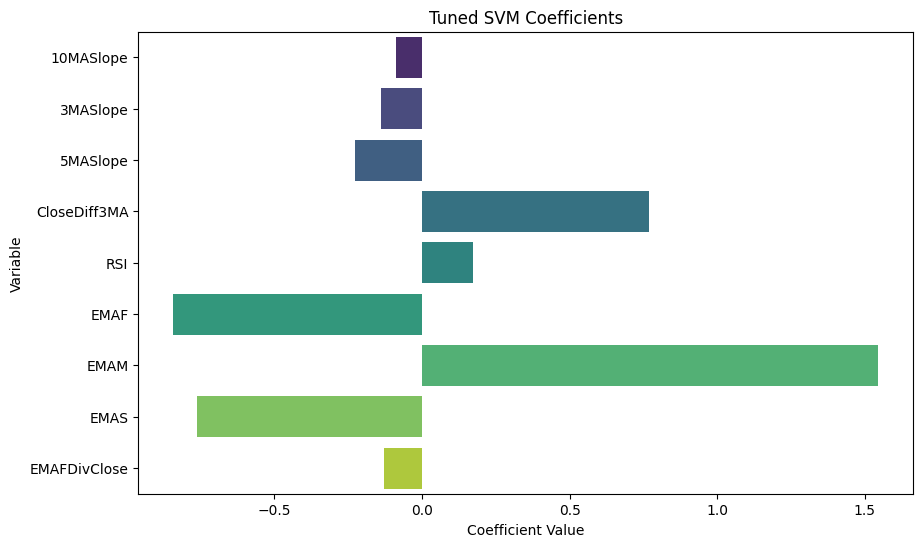

In [58]:
coefficients = best_svm_model.coef_[0]
variable_names = X.columns

# Create a DataFrame for easier plotting
coef_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coef_df, palette='viridis')
plt.title('Tuned SVM Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Variable')
plt.show()

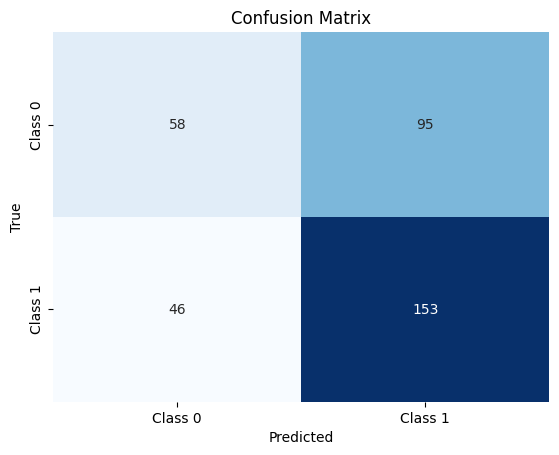

In [45]:
best_svm_test = best_svm_model.predict(X_test_scaled)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, best_svm_test)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


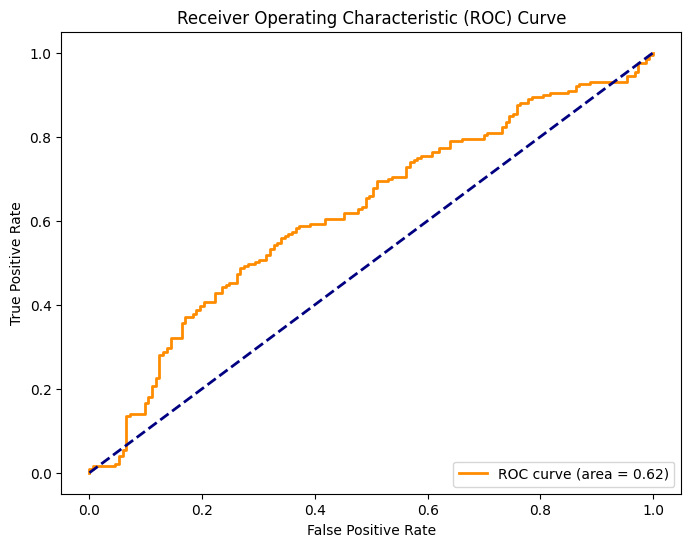

In [46]:
fpr, tpr, _ = roc_curve(y_test, best_svm_model.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

 1    190
-1     62
Name: predicted_signal, dtype: int64

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2019-08-08,1,0.011786,0.011786
2019-08-09,1,-0.007863,-0.007863
2019-08-12,-1,-0.012034,0.012034
2019-08-13,1,0.000594,0.000594
2019-08-14,-1,-0.012470,0.012470


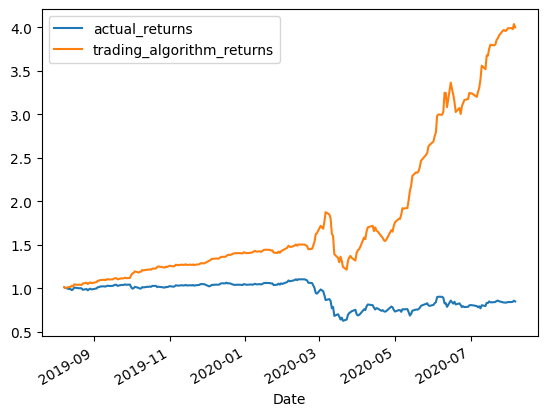

In [47]:
predictions_df = pd.DataFrame(index=X_val.index)

predictions_df["predicted_signal"] = np.where(val_svm_pred > 0.5, 1, -1)

predictions_df["actual_returns"] = df["Open"]

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
display(predictions_df['predicted_signal'].value_counts())
display(predictions_df.head())

# Plot cumulative returns
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()
plt.show()

 1    248
-1    104
Name: predicted_signal, dtype: int64

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2020-08-07,1,0.036780,0.036780
2020-08-10,1,0.025770,0.025770
2020-08-11,1,0.001305,0.001305
2020-08-12,-1,-0.030303,0.030303
2020-08-13,-1,-0.000672,0.000672


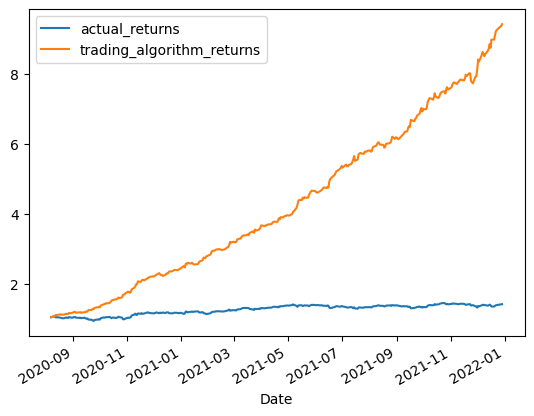

In [48]:
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = np.where(test_svm_pred > 0.5, 1, -1)

predictions_df["actual_returns"] = df["Open"]

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
display(predictions_df['predicted_signal'].value_counts())
display(predictions_df.head())

# Plot cumulative returns
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()
plt.show()

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

logModel = LogisticRegression()

model=logModel.fit(X_train_scaled, y_train)

In [52]:
train_LOGREG_pred = logModel.predict(X_train_scaled)
train_report = classification_report(y_train, train_LOGREG_pred)

print("Training Classification Report:")
print(train_report)

Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.35      0.44       434
         1.0       0.63      0.83      0.71       574

    accuracy                           0.62      1008
   macro avg       0.61      0.59      0.58      1008
weighted avg       0.62      0.62      0.59      1008



In [53]:
val_log_pred=logModel.predict(X_val_scaled)

log_testing_report = classification_report(y_val, val_log_pred)
print("Validation Classification Report:")
print(log_testing_report)


Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.42      0.49       118
         1.0       0.59      0.74      0.66       134

    accuracy                           0.59       252
   macro avg       0.59      0.58      0.57       252
weighted avg       0.59      0.59      0.58       252



In [54]:
test_log_pred=logModel.predict(X_test_scaled)

log_testing_report = classification_report(y_test, test_log_pred)

print(log_testing_report)

              precision    recall  f1-score   support

         0.0       0.55      0.48      0.52       153
         1.0       0.64      0.70      0.67       199

    accuracy                           0.61       352
   macro avg       0.59      0.59      0.59       352
weighted avg       0.60      0.61      0.60       352



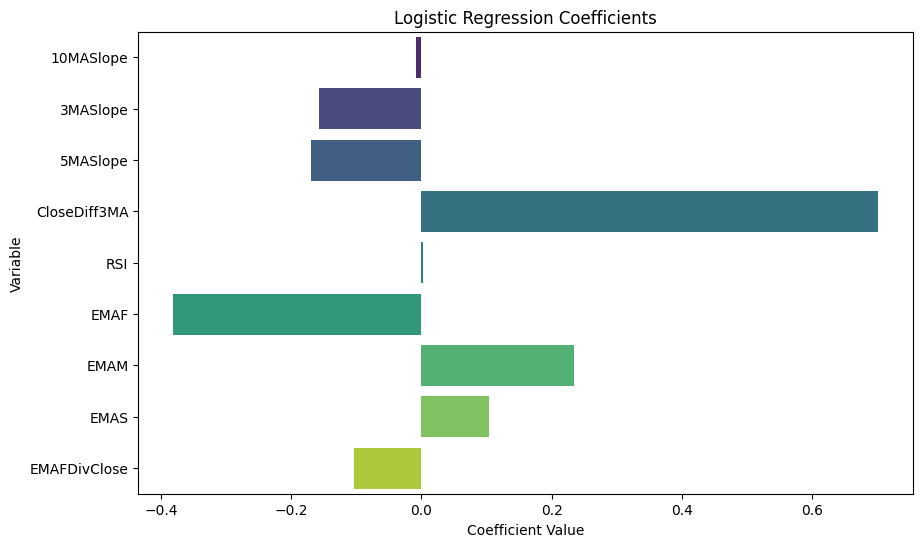

In [57]:
coefficients = logModel.coef_[0]
variable_names = X.columns

# Create a DataFrame for easier plotting
coef_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coef_df, palette='viridis')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Variable')
plt.show()

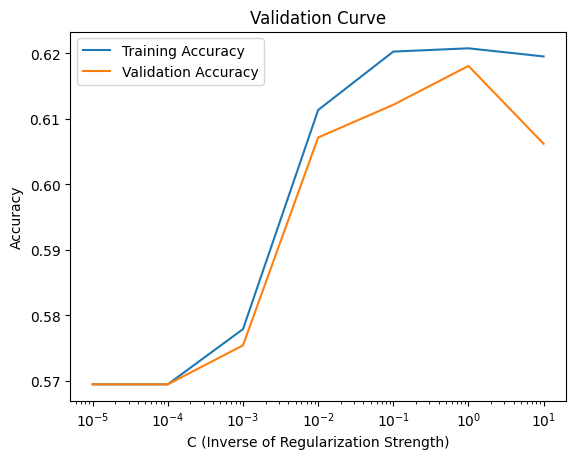

In [82]:
from sklearn.model_selection import validation_curve


param_range = [0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10]
train_scores, val_scores = validation_curve(
    LogisticRegression(), X_train_scaled, y_train, param_name='C', param_range=param_range, cv=5
)

plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(val_scores, axis=1), label='Validation Accuracy')
plt.xscale('log')
plt.title('Validation Curve')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

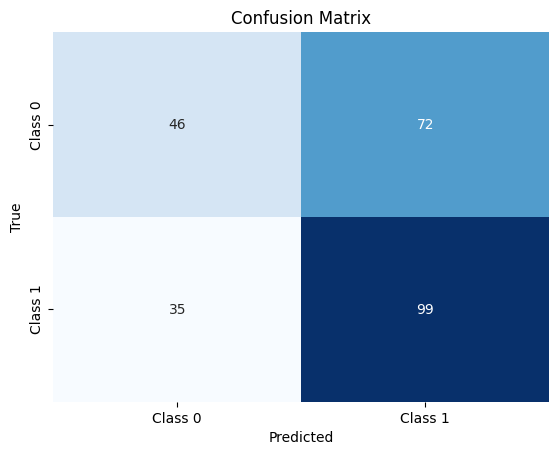

In [83]:
log_pred = logModel.predict(X_val_scaled)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, log_pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

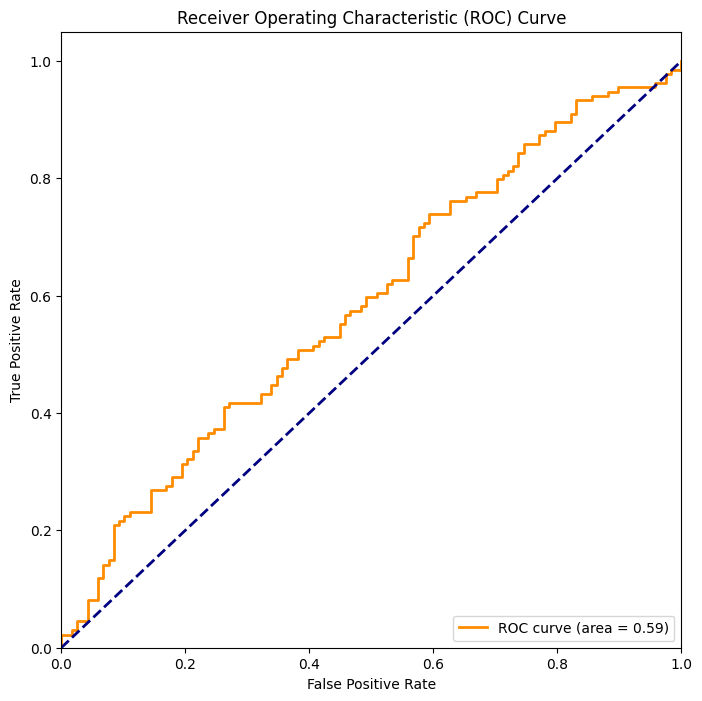

In [84]:
log_prob = logModel.predict_proba(X_val_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, log_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

 1    171
-1     81
Name: predicted_signal, dtype: int64

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2019-08-08,1,-0.007863,-0.007863
2019-08-09,1,-0.012034,-0.012034
2019-08-12,-1,0.000594,-0.000594
2019-08-13,1,-0.012470,-0.012470
2019-08-14,-1,0.006915,-0.006915


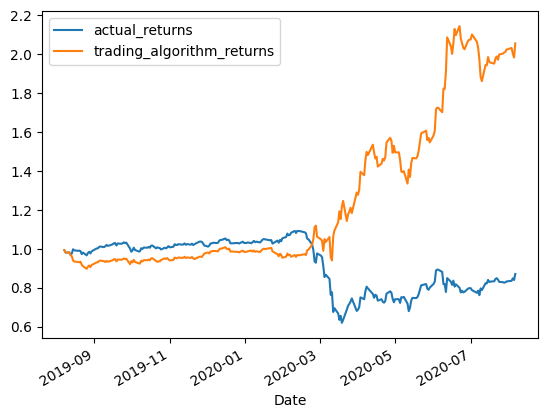

In [88]:
predictions_df = pd.DataFrame(index=X_val.index)

predictions_df["predicted_signal"] = np.where(val_log_pred > 0.5, 1, -1)

predictions_df["actual_returns"] = df["Open"].shift(-1)

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
display(predictions_df['predicted_signal'].value_counts())
display(predictions_df.head())

# Plot cumulative returns
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()
plt.show()

 1    220
-1    132
Name: predicted_signal, dtype: int64

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2020-08-07,1,0.025770,0.025770
2020-08-10,1,0.001305,0.001305
2020-08-11,-1,-0.030303,0.030303
2020-08-12,-1,-0.000672,0.000672
2020-08-13,-1,0.004371,-0.004371


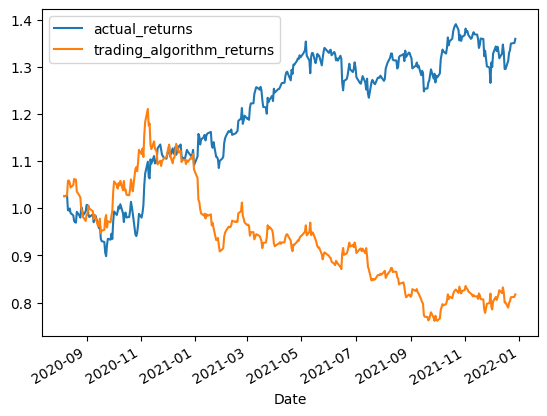

In [89]:
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = np.where(test_log_pred > 0.5, 1, -1)

predictions_df["actual_returns"] = df["Open"].shift(-1)

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
display(predictions_df['predicted_signal'].value_counts())
display(predictions_df.head())

# Plot cumulative returns
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()
plt.show()

## Lasso Logistic Regression

In [59]:
lasso_log_model = LogisticRegression(penalty='l1', solver='liblinear')

# Fit the model to the training data
lasso_log_model.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [60]:
train_lasso_pred = lasso_log_model.predict(X_train_scaled)
train_report = classification_report(y_train, train_lasso_pred)

print("Training Classification Report:")
print(train_report)

Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.34      0.43       434
         1.0       0.62      0.83      0.71       574

    accuracy                           0.62      1008
   macro avg       0.61      0.59      0.57      1008
weighted avg       0.62      0.62      0.59      1008



In [61]:
# Make predictions on the testing data
lasso_val_pred = lasso_log_model.predict(X_val_scaled)

# Evaluate the model
lasso_log_testing_report = classification_report(y_val, lasso_val_pred)

print(lasso_log_testing_report)

              precision    recall  f1-score   support

         0.0       0.56      0.41      0.47       118
         1.0       0.58      0.72      0.64       134

    accuracy                           0.58       252
   macro avg       0.57      0.57      0.56       252
weighted avg       0.57      0.58      0.56       252



In [62]:
# Make predictions on the testing data
lasso_test_pred = lasso_log_model.predict(X_test_scaled)

# Evaluate the model
lasso_log_testing_report = classification_report(y_test, lasso_test_pred)

print(lasso_log_testing_report)

              precision    recall  f1-score   support

         0.0       0.56      0.47      0.51       153
         1.0       0.64      0.71      0.67       199

    accuracy                           0.61       352
   macro avg       0.60      0.59      0.59       352
weighted avg       0.60      0.61      0.60       352



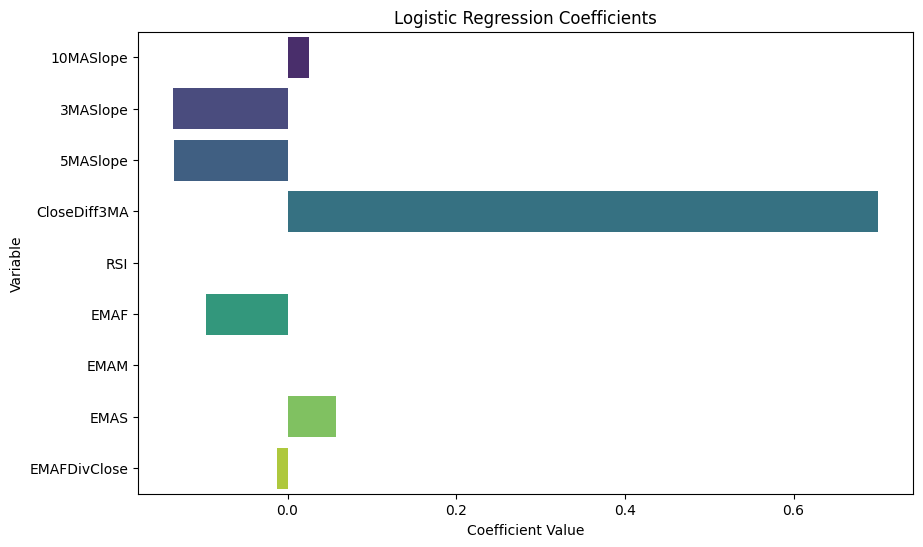

In [63]:
coefficients = lasso_log_model.coef_[0]
variable_names = X.columns

# Create a DataFrame for easier plotting
coef_df = pd.DataFrame({'Variable': variable_names, 'Coefficient': coefficients})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coef_df, palette='viridis')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Variable')
plt.show()

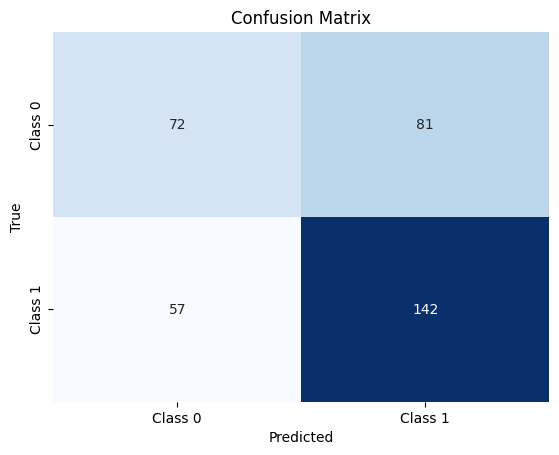

In [66]:
# Make predictions on the test data
lasso_log_pred = lasso_log_model.predict(X_test_scaled)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, lasso_log_pred)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


- The ROC curve illustrates the trade-off between sensitivity (true positive rate) and specificity (true negative rate).
- The point on the curve where sensitivity and specificity are balanced is often of interest, and this point corresponds to the threshold where the model maximizes the sum of sensitivity and specificity.


In [68]:
from sklearn.model_selection import validation_curve


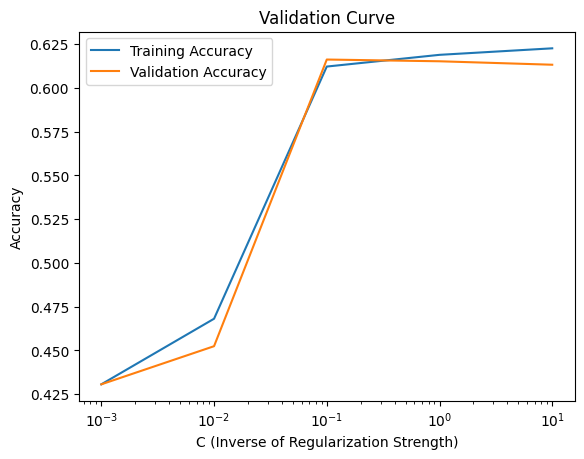

In [69]:
param_range = [0.001, 0.01, 0.1, 1, 10]  # Example values for the hyperparameter
train_scores, val_scores = validation_curve(
    LogisticRegression(penalty='l1', solver='liblinear'), X_train_scaled, y_train, param_name='C', param_range=param_range, cv=5
)

plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(param_range, np.mean(val_scores, axis=1), label='Validation Accuracy')
plt.xscale('log')
plt.title('Validation Curve')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

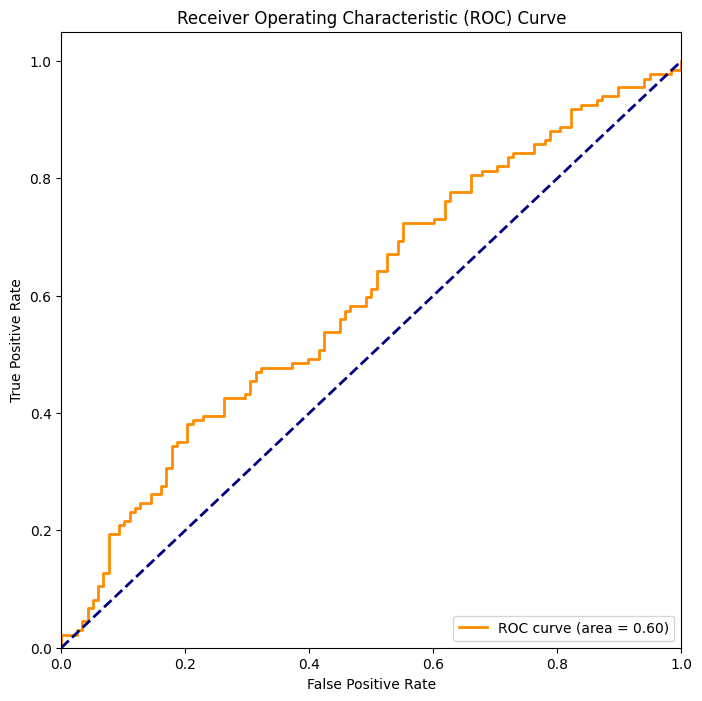

In [70]:
lasso_log_prob = lasso_log_model.predict_proba(X_val_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, lasso_log_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

 1    765
-1    243
Name: predicted_signal, dtype: int64

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2015-08-06,-1,0.008027,-0.008027
2015-08-07,1,0.004191,0.004191
2015-08-10,1,-0.001530,-0.001530
2015-08-11,1,-0.000557,-0.000557
2015-08-12,-1,0.003903,-0.003903


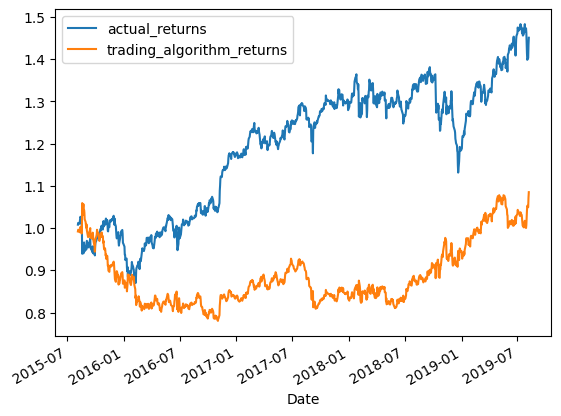

In [76]:
predictions_df = pd.DataFrame(index=X_train.index)

predictions_df["predicted_signal"] = np.where(train_lasso_pred > 0.5, 1, -1)

predictions_df["actual_returns"] = df["Open"].shift(-1)

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
display(predictions_df['predicted_signal'].value_counts())
display(predictions_df.head())

# Plot cumulative returns
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()
plt.show()

 1    167
-1     85
Name: predicted_signal, dtype: int64

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2019-08-08,1,-0.007863,-0.007863
2019-08-09,1,-0.012034,-0.012034
2019-08-12,-1,0.000594,-0.000594
2019-08-13,1,-0.012470,-0.012470
2019-08-14,-1,0.006915,-0.006915


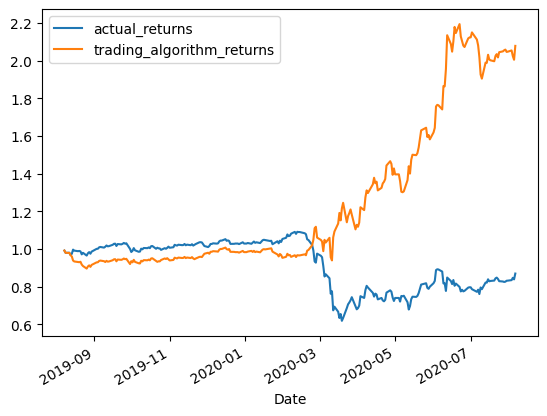

In [71]:
predictions_df = pd.DataFrame(index=X_val.index)

predictions_df["predicted_signal"] = np.where(lasso_val_pred > 0.5, 1, -1)

predictions_df["actual_returns"] = df["Open"].shift(-1)

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
display(predictions_df['predicted_signal'].value_counts())
display(predictions_df.head())

# Plot cumulative returns
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()
plt.show()

 1    223
-1    129
Name: predicted_signal, dtype: int64

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2020-08-07,1,0.025770,0.025770
2020-08-10,1,0.001305,0.001305
2020-08-11,1,-0.030303,-0.030303
2020-08-12,-1,-0.000672,0.000672
2020-08-13,-1,0.004371,-0.004371


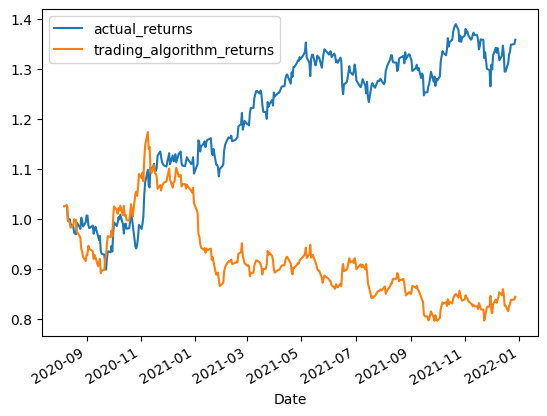

In [72]:
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = np.where(lasso_test_pred > 0.5, 1, -1)

predictions_df["actual_returns"] = df["Open"].shift(-1)

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
display(predictions_df['predicted_signal'].value_counts())
display(predictions_df.head())

# Plot cumulative returns
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()
plt.show()

# LSTM()

In [20]:
pip install keras-tuner

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from pandas.tseries.offsets import DateOffset

In [22]:
import keras_tuner as kt

In [93]:
"""X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_reshaped = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

"""

### LSTM tuner

In [23]:
# Reshape the data for LSTM Tuner
X_train_t = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_t = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
X_test_t = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [98]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit', min_value=32, max_value=128, step=32), return_sequences=True, input_shape=(1, 9)))
    for i in range(hp.Int('n_layers', 1, 10)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units', min_value=32, max_value=128, step=32), return_sequences=True))
    model.add(LSTM(6))
    model.add(Dropout(hp.Float('Dropout_rate', min_value=0, max_value=0.5, step=0.1)))
    model.add(Dense(6))
    model.add(Dropout(hp.Float('Dropout_rate', min_value=0, max_value=0.5, step=0.1)))
    model.add(Dense(1))

    # Add additional metrics you are interested in
    metrics = ['mse', 'mae', 'accuracy']

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=metrics) #Binary_crossEntropy
    return model

In [101]:
 tuner = kt.RandomSearch(
    build_model,
    objective='val_mse',  # need to choose choose 'val_mae', 'val_accuracy'
    max_trials=10,
    executions_per_trial=3,
    directory='tuner_directory',
    project_name='my_tuner_randomFind2'
)

tuner.search(
    x=X_train_t,
    y=y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_val_t, y_val),
)

Trial 10 Complete [00h 01m 15s]
val_mse: 0.2436536649862925

Best val_mse So Far: 0.24254597226778665
Total elapsed time: 00h 12m 19s


In [102]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            70656     
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            98816     
                                                                 
 lstm_3 (LSTM)               (None, 1, 128)            131584    
                                                                 
 lstm_4 (LSTM)               (None, 1, 128)            131584    
                                                                 
 lstm_5 (LSTM)               (None, 1, 32)             20608     
                                                                 
 lstm_6 (LSTM)               (None, 1, 96)             4

In [124]:
y_train_pred = best_model.predict(X_train_t)

threshold = 0.5
y_train_pred_binary = (y_train_pred > threshold).astype(int)


32/32 [==============================] - 0s 8ms/step


In [125]:
classification_rep = classification_report(y_train, y_train_pred_binary)
print(classification_rep)

              precision    recall  f1-score   support

         0.0       0.56      0.44      0.49       434
         1.0       0.64      0.74      0.68       574

    accuracy                           0.61      1008
   macro avg       0.60      0.59      0.59      1008
weighted avg       0.60      0.61      0.60      1008



In [103]:
y_val_pred = best_model.predict(X_val_t)

threshold = 0.5
y_val_pred_binary = (y_val_pred > threshold).astype(int)


8/8 [==============================] - 4s 7ms/step


In [104]:
classification_rep = classification_report(y_val, y_val_pred_binary)
print(classification_rep)

              precision    recall  f1-score   support

         0.0       0.55      0.56      0.55       118
         1.0       0.61      0.60      0.60       134

    accuracy                           0.58       252
   macro avg       0.58      0.58      0.58       252
weighted avg       0.58      0.58      0.58       252



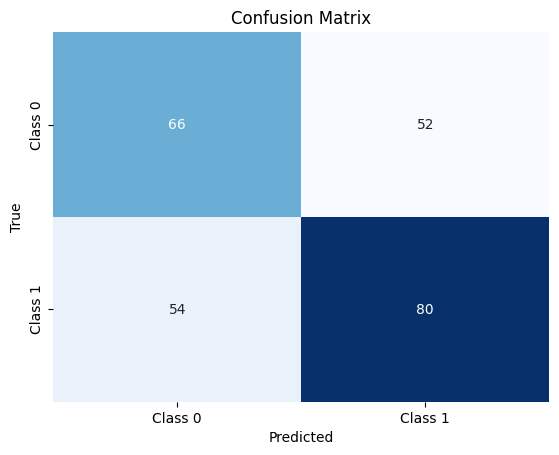

In [105]:
conf_matrix = confusion_matrix(y_val, y_val_pred_binary)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

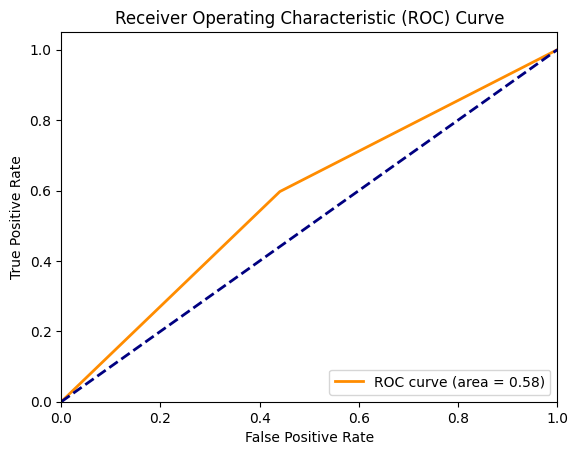

In [106]:
fpr, tpr, _ = roc_curve(y_val, y_val_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

 1    132
-1    120
Name: predicted_signal, dtype: int64

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2019-08-08,1,-0.007863,-0.007863
2019-08-09,1,-0.012034,-0.012034
2019-08-12,-1,0.000594,-0.000594
2019-08-13,1,-0.012470,-0.012470
2019-08-14,-1,0.006915,-0.006915


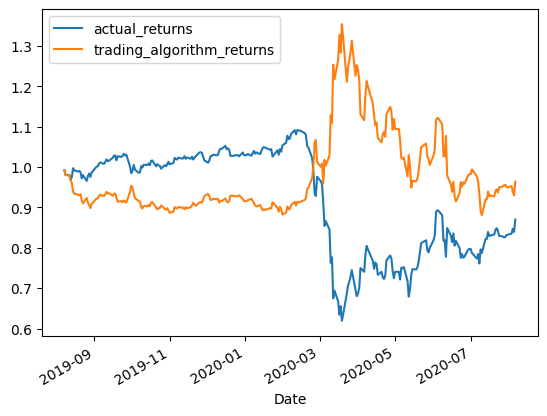

In [107]:
predictions_df = pd.DataFrame(index=X_val.index)

predictions_df["predicted_signal"] = np.where(y_val_pred_binary > 0.5, 1, -1)

predictions_df["actual_returns"] = df["Open"].shift(-1)

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
display(predictions_df['predicted_signal'].value_counts())
display(predictions_df.head())

# Plot cumulative returns
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()
plt.show()

In [24]:
nan_indices_y_test = np.isnan(y_val)
nan_indices_y_test_pred = np.isnan(y_test_pred_binary)

In [25]:
print("NaN indices in y_test:", np.where(nan_indices_y_test)[0])

print("NaN indices in y_test_pred_binary:", np.where(nan_indices_y_test_pred)[0])

NaN indices in y_test: []


In [115]:
y_test_pred = best_model.predict(X_test_t)

threshold = 0.5
y_test_pred_binary = (y_test_pred > threshold).astype(int)


11/11 [==============================] - 0s 8ms/step


In [116]:
len(y_test_pred_binary)

352

In [117]:
classification_rep = classification_report(y_test, y_test_pred_binary)
print(classification_rep)

              precision    recall  f1-score   support

         0.0       0.54      0.58      0.56       153
         1.0       0.66      0.61      0.63       199

    accuracy                           0.60       352
   macro avg       0.60      0.60      0.60       352
weighted avg       0.60      0.60      0.60       352



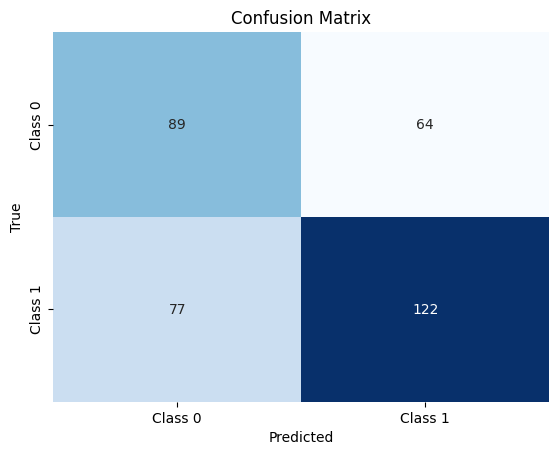

In [118]:
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

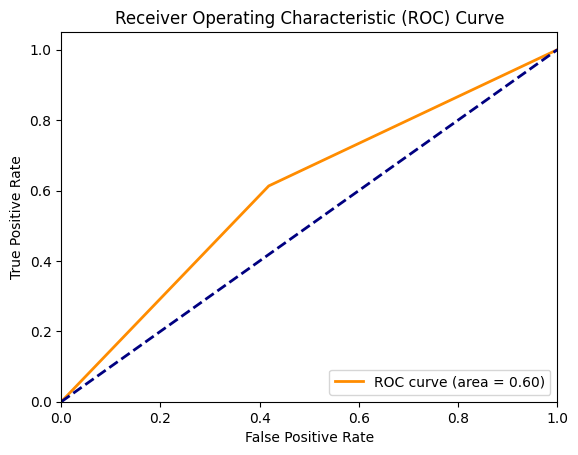

In [119]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

 1    186
-1    166
Name: predicted_signal, dtype: int64

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2020-08-07,1,0.025770,0.025770
2020-08-10,1,0.001305,0.001305
2020-08-11,1,-0.030303,-0.030303
2020-08-12,-1,-0.000672,0.000672
2020-08-13,-1,0.004371,-0.004371


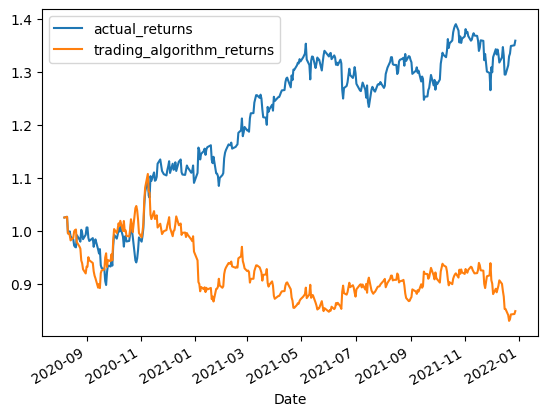

In [120]:
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = np.where(y_test_pred_binary > 0.5, 1, -1)

predictions_df["actual_returns"] = df["Open"].shift(-1)

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
display(predictions_df['predicted_signal'].value_counts())
display(predictions_df.head())

# Plot cumulative returns
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()
plt.show()

In [26]:
from keras.metrics import Precision as precision_metric
from keras.metrics import Recall as recall_metric
from keras.metrics import F1Score
import tensorflow as tf

In [27]:

def build_model2(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit', min_value=32, max_value=128, step=32), return_sequences=True, input_shape=(1, 9)))
    for i in range(hp.Int('n_layers', 1, 10)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units', min_value=32, max_value=128, step=32), return_sequences=True))
    model.add(LSTM(6))
    model.add(Dropout(hp.Float('Dropout_rate', min_value=0, max_value=0.5, step=0.1)))
    model.add(Dense(6))
    model.add(Dropout(hp.Float('Dropout_rate', min_value=0, max_value=0.5, step=0.1)))
    model.add(Dense(1))

    metrics = ['accuracy', F1Score(name='f1_score')]

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics) #Binary_crossEntropy
    return model

In [28]:
 tuner2 = kt.RandomSearch(
    build_model2,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='tuner_directory',
    project_name='my_tuner_classification4'
)

tuner2.search(
    x=X_train_t,
    y=y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_val_t, y_val),
)

Trial 10 Complete [00h 01m 56s]
val_loss: 8.202156066894531

Best val_loss So Far: 0.6993317206700643
Total elapsed time: 00h 12m 38s


In [29]:
best_model2 = tuner2.get_best_models(num_models=1)[0]
best_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             18944     
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            98816     
                                                                 
 lstm_2 (LSTM)               (None, 1, 32)             20608     
                                                                 
 lstm_3 (LSTM)               (None, 1, 32)             8320      
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             24832     
                                                                 
 lstm_5 (LSTM)               (None, 1, 128)            98816     
                                                                 
 lstm_6 (LSTM)               (None, 1, 64)             4

In [37]:
y_train_pred2 = best_model2.predict(X_train_t)
threshold = 0.5
y_train_pred_binary2 = (y_train_pred2 > threshold).astype(int)


32/32 [==============================] - 0s 8ms/step


In [38]:
classification_rep2 = classification_report(y_train, y_train_pred_binary2)
print(classification_rep2)

              precision    recall  f1-score   support

         0.0       0.47      0.88      0.62       434
         1.0       0.74      0.26      0.39       574

    accuracy                           0.53      1008
   macro avg       0.61      0.57      0.50      1008
weighted avg       0.63      0.53      0.48      1008



In [41]:
y_val_pred2 = best_model2.predict(X_val_t)
threshold = 0.5
y_val_pred_binary2 = (y_val_pred2 > threshold).astype(int)


8/8 [==============================] - 0s 9ms/step


In [42]:
classification_rep2 = classification_report(y_val, y_val_pred_binary2)
print(classification_rep2)

              precision    recall  f1-score   support

         0.0       0.51      0.63      0.56       118
         1.0       0.58      0.46      0.52       134

    accuracy                           0.54       252
   macro avg       0.55      0.54      0.54       252
weighted avg       0.55      0.54      0.54       252



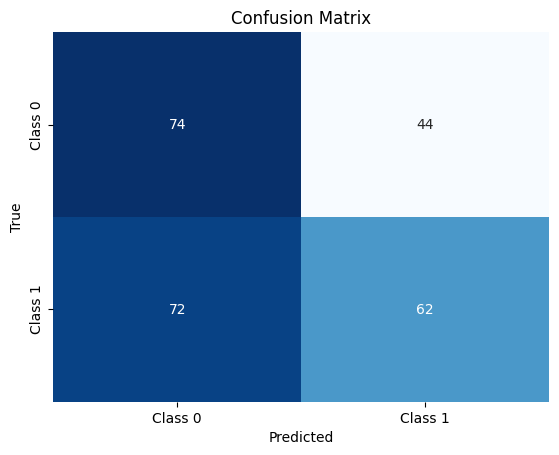

In [43]:
conf_matrix2 = confusion_matrix(y_val, y_val_pred_binary2)

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

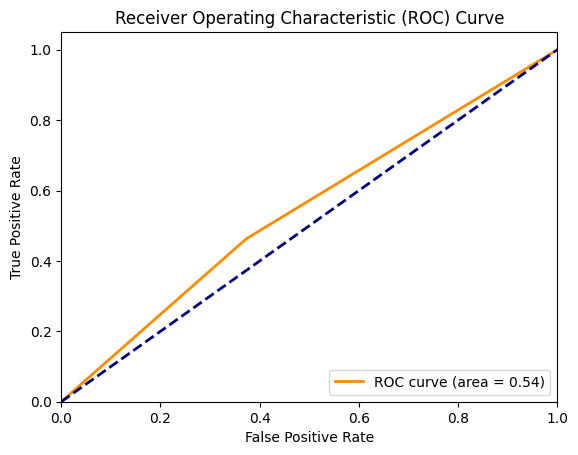

In [44]:
fpr, tpr, _ = roc_curve(y_val, y_val_pred_binary2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

-1    146
 1    106
Name: predicted_signal, dtype: int64

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2019-08-08,1,-0.007863,-0.007863
2019-08-09,1,-0.012034,-0.012034
2019-08-12,-1,0.000594,-0.000594
2019-08-13,-1,-0.012470,0.012470
2019-08-14,-1,0.006915,-0.006915


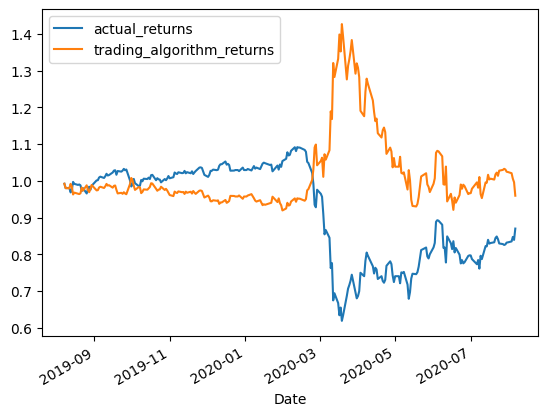

In [45]:
predictions_df = pd.DataFrame(index=X_val.index)

predictions_df["predicted_signal"] = np.where(y_val_pred_binary2 > 0.5, 1, -1)

predictions_df["actual_returns"] = df["Open"].shift(-1)

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
display(predictions_df['predicted_signal'].value_counts())
display(predictions_df.head())

# Plot cumulative returns
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()
plt.show()

In [46]:
y_test_pred2 = best_model2.predict(X_test_t)
threshold = 0.5
y_test_pred_binary2 = (y_test_pred2 > threshold).astype(int)
classification_rep2 = classification_report(y_test, y_test_pred_binary2)
print(classification_rep2)

11/11 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

         0.0       0.48      0.49      0.49       153
         1.0       0.60      0.60      0.60       199

    accuracy                           0.55       352
   macro avg       0.54      0.54      0.54       352
weighted avg       0.55      0.55      0.55       352



 1    197
-1    155
Name: predicted_signal, dtype: int64

,predicted_signal,actual_returns,trading_algorithm_returns
Date,,,
2020-08-07,1,0.025770,0.025770
2020-08-10,1,0.001305,0.001305
2020-08-11,1,-0.030303,-0.030303
2020-08-12,-1,-0.000672,0.000672
2020-08-13,-1,0.004371,-0.004371


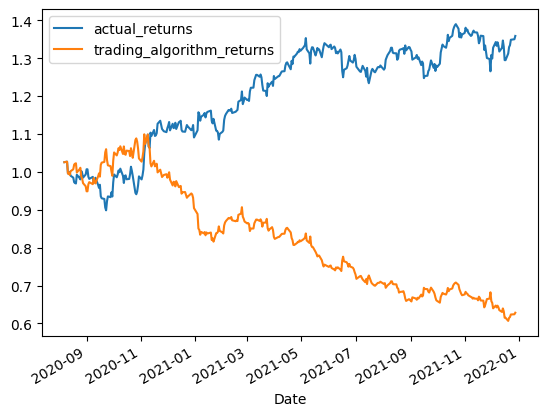

In [47]:
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["predicted_signal"] = np.where(y_test_pred_binary2 > 0.5, 1, -1)

predictions_df["actual_returns"] = df["Open"].shift(-1)

predictions_df["trading_algorithm_returns"] = (
    predictions_df["actual_returns"] * predictions_df["predicted_signal"]
)

# Review the DataFrame
display(predictions_df['predicted_signal'].value_counts())
display(predictions_df.head())

# Plot cumulative returns
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot()
plt.show()